<a href="https://colab.research.google.com/github/R4F4I/semester-3-FAST-K240009/blob/master/pai/lab/classwork/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fetching data from the CoinGecko API...
Data fetched successfully!

Cleaning and preparing data with Pandas...
Data cleaning complete. Here's a preview of the clean data:

         date          price
0  2025-08-21  114252.397552
1  2025-08-22  112414.399873
2  2025-08-23  116834.249482
3  2025-08-24  115359.983467
4  2025-08-25  113399.548473


Generating the Seaborn plot...


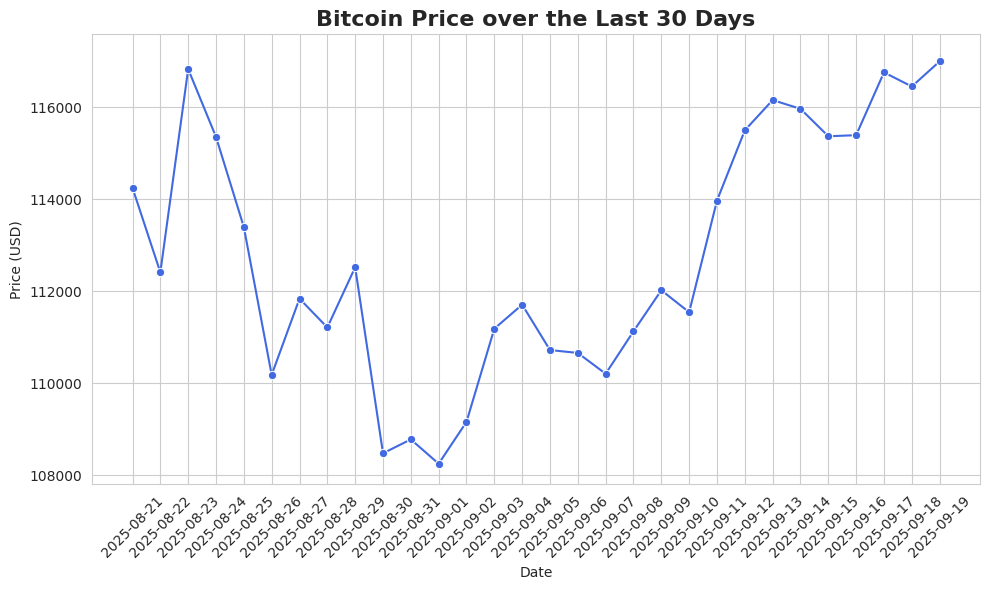

Plot generation complete.


In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# Step 1: Fetching data from a live public API
# This API endpoint provides historical price data for Bitcoin in USD for the last 30 days.
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=30&interval=daily"
print("Fetching data from the CoinGecko API...")

try:
    response = requests.get(url)
    response.raise_for_status()  # This will raise an HTTPError if the response was an error
    data = response.json()
    print("Data fetched successfully!\n")
except requests.exceptions.RequestException as e:
    print(f"Error fetching data: {e}")
    exit()

# Step 2: Cleaning the data with Pandas
# The 'prices' key contains a list of lists, where each inner list is [timestamp, price].
# We need to convert this into a clean Pandas DataFrame.
print("Cleaning and preparing data with Pandas...")
prices_data = data['prices']
df = pd.DataFrame(prices_data, columns=['timestamp', 'price'])

# Convert the Unix timestamp to a readable datetime format.
# A lambda function is used here to apply the transformation to each row.
df['date'] = df['timestamp'].apply(lambda x: dt.datetime.fromtimestamp(x / 1000).strftime('%Y-%m-%d'))

# The 'price' column is already a numeric float, but it's good practice to ensure it.
df['price'] = pd.to_numeric(df['price'])

# We only need 'date' and 'price' for our visualization.
clean_df = df[['date', 'price']].copy()
print("Data cleaning complete. Here's a preview of the clean data:\n")
print(clean_df.head())
print("\n" + "="*50 + "\n")

# Step 3: Visualizing the data with Seaborn
print("Generating the Seaborn plot...")
sns.set_style("whitegrid") # Sets the style of the plot

plt.figure(figsize=(10, 6)) # Sets the figure size for better readability

# Create a line plot using Seaborn's 'lineplot' function.
# 'x' is the date, 'y' is the price.
sns.lineplot(x='date', y='price', data=clean_df, marker='o', color='royalblue')

# Add a title and labels for clarity
plt.title('Bitcoin Price over the Last 30 Days', fontsize=16, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

# Improve the readability of the x-axis labels
plt.xticks(rotation=45)
plt.tight_layout() # Adjusts plot parameters for a tight layout

# Display the plot
plt.show()
print("Plot generation complete.")

In [2]:
# Define color codes as constants for cleaner code
RED = '\033[31m'
GREEN = '\033[32m'
YELLOW = '\033[33m'
RESET = '\033[0m'

# Print text with different colors
print(f"{RED}This text is red. {GREEN}This text is green. {RESET}This text is back to normal.")

# Combine multiple attributes, like bold and color
BOLD_BLUE = '\033[1;34m'
print(f"{BOLD_BLUE}This text is bold and blue!{RESET}")

This text is red. This text is green. This text is back to normal.
This text is bold and blue!
